[[ 0.00000000e+00  0.00000000e+00  5.00000000e-03  1.00000000e-02]
 [ 1.33981194e-01 -1.26887888e-01  9.98724439e-03  2.26701947e-02]
 [ 9.72428022e-02 -1.31600502e-01  1.49759548e-02  2.78686489e-02]
 ...
 [-1.34685715e+02 -1.48906841e+02  4.95304850e+01  9.97280854e+01]
 [-1.33946191e+02 -1.49575346e+02  4.95354836e+01  9.97380820e+01]
 [-1.33202968e+02 -1.50240468e+02  4.95404836e+01  9.97480820e+01]]


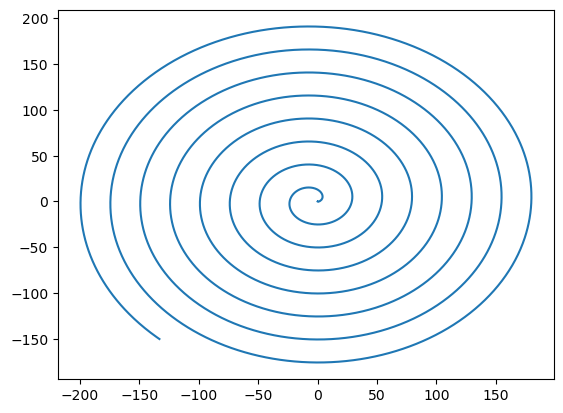

In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from vehicle import Vehicle

measurement_stds=[0.1,0.1,0.01,0.02]
trajectory = np.empty((0,4), float)
ground_truth = []
covariances = []

#Initialize model
x0 = np.array([0,0,0,0])
P0 = np.eye(4)
u = np.array([1,0.5])
vehicle = Vehicle(x=x0)
x_prev = x0
P_prev = P0
Q = np.diag(np.zeros((x0.size)))
R_state = np.diag(measurement_stds[:2])
R_input = np.diag(measurement_stds[2:])

num_iterations = 10000
k = 0
while k <= num_iterations:
    
    #Prediction step
    P_pred = vehicle.F(x_prev) @ P_prev @ vehicle.F(x_prev).T + Q
    x_pred = vehicle.f(x_prev, u)
    #Update step
    if k % 100:
        R = R_state
        y, _ = vehicle.full_observation(x_prev, u)
        g, G = vehicle.full_observation(x_pred, u, enable_noise=False)
    else:
        R = R_input
        y, _ = vehicle.full_observation(x_prev, u)
        g, G = vehicle.rate_and_accel_observation(x_pred, u, enable_noise=False)

    K = P_pred @ G.T @ np.linalg.inv(G @ P_pred @ G.T + R)
    P = (np.eye(x_pred.size) - K @ G) @ P_pred
    x = x_pred + K @ (y - g)

    x_prev = x
    P_prev = P
    trajectory = np.vstack((trajectory, x))
    #np.vstack((ground_truth, y.T))
    #covariances = covariances.append(P)

    k+=1

print(trajectory)
plt.plot(trajectory[:,0], trajectory[:, 1])

with open("ekf_run", 'wb') as f:
    pickle.dump(trajectory, f)



In [ ]:
import numpy as np
import pickle
from vehicle import Vehicle
def main():

    trajectory = []

    #Initialize model
    x0 = np.array([0,0,0])
    u = np.array([1,0.5])
    vehicle = Vehicle(x0)
    x_prev = x0

    num_iterations = 100
    k = 0
    while k <= num_iterations:
        
        #Prediction step
        P_pred = F @ P_prev @ F.T + Q
        x_pred = vehicle.vehicle_dynamics(u)
        
        #Update step
        K = P_pred @ G.T @ np.linalg.inv(G @ P_pred @ G.T + R)
        P = (np.eye(x.size) - K @ G) @ P_pred
        x = x_pred + K @ (y - g(x_pred))

        x_prev = x
        P_prev = P
        trajectory.append([x,P])
    
    with open("ekf_run", 'wb') as f:
        pickle.dump(trajectory, f)


In [ ]:
import numpy as np
import pickle
from vehicle import Vehicle
def main():

    trajectory = []

    #Initialize model
    x0 = np.array([0,0,0])
    u = np.array([1,0.5])
    vehicle = Vehicle(x0)
    x_prev = x0

    num_iterations = 100
    k = 0
    while k <= num_iterations:
        
        #Prediction step
        P_pred = vehicle.F @ P_prev @ vehicle.F.T + Q
        x_pred = vehicle.f(x_prev, u)
        
        #Update step
        K = P_pred @ G.T @ np.linalg.inv(G @ P_pred @ G.T + R)
        P = (np.eye(x.size) - K @ G) @ P_pred
        x = x_pred + K @ (y - g(x_pred))

        x_prev = x
        P_prev = P
        trajectory.append([x,P])
    
    with open("ekf_run", 'wb') as f:
        pickle.dump(trajectory, f)


In [ ]:
import numpy as np
import pickle
from vehicle import Vehicle
def main():

    trajectory = []

    #Initialize model
    x0 = np.array([0,0,0])
    u = np.array([1,0.5])
    vehicle = Vehicle(x0)
    x_prev = x0

    num_iterations = 100
    k = 0
    while k <= num_iterations:
        
        #Prediction step
        P_pred = F @ P_prev @ F.T + Q
        x_pred = vehicle.vehicle_dynamics(u)
        
        #Update step
        K = P_pred @ G.T @ np.linalg.inv(G @ P_pred @ G.T + R)
        P = (np.eye(x.size) - K @ G) @ P_pred
        x = x_pred + K @ (y - g(x_pred))

        x_prev = x
        P_prev = P
        trajectory.append([x,P])
    
    with open("ekf_run", 'wb') as f:
        pickle.dump(trajectory, f)


In [ ]:
import numpy as np
import pickle
from vehicle import Vehicle
def main():

    trajectory = []

    #Initialize model
    x0 = np.array([0,0,0])
    u = np.array([1,0.5])
    vehicle = Vehicle(x0)
    x_prev = x0

    num_iterations = 100
    k = 0
    while k <= num_iterations:
        
        #Prediction step
        P_pred = F @ P_prev @ F.T + Q
        x_pred = vehicle.vehicle_dynamics(u)
        
        #Update step
        K = P_pred @ G.T @ np.linalg.inv(G @ P_pred @ G.T + R)
        P = (np.eye(x.size) - K @ G) @ P_pred
        x = x_pred + K @ (y - g(x_pred))

        x_prev = x
        P_prev = P
        trajectory.append([x,P])
    
    with open("ekf_run", 'wb') as f:
        pickle.dump(trajectory, f)
